In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,Lasso,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix
from xgboost import XGBRegressor,XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/An introduction to statistical analysis/data/Boston.csv')
df = df.iloc[:, 1:]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
X = df.drop(['MEDV'], axis =1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2025)
print(f'Number of train samples: {X_train.shape[0]}')
print(f'Number of test samples: {X_test.shape[0]}')

Number of train samples: 379
Number of test samples: 127


In [ ]:
p = X.shape[1]
max_features_dict = {'p': p, 'p//2': p//2, 'sqrt': int(np.sqrt(p))}
mse_dict = {}

for num_of_features in max_features_dict.values():
    scores = []
    for n_est in range(1, 501, 10):
        model = RandomForestRegressor(n_estimators = n_est, max_features=num_of_features)
        model.fit(X_train, y_train)
        model_preds =  model.predict(X_test)
        scores.append(mean_squared_error(y_test, model_preds))
    mse_dict[num_of_features] = scores


Text(0, 0.5, 'Test MSE')

<Figure size 600x1000 with 0 Axes>

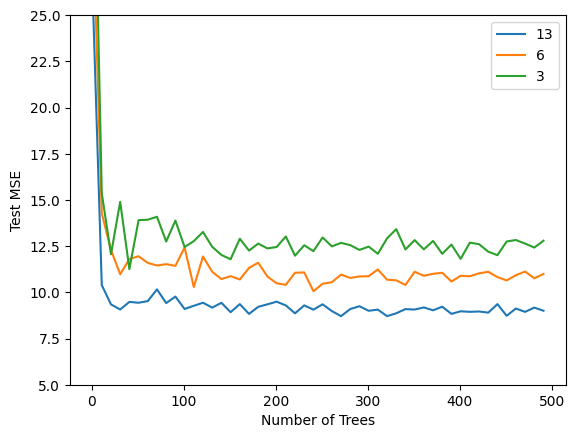

In [ ]:
mse_dict.keys()

scores_df = pd.DataFrame(mse_dict)
scores_df.index = np.arange(1,501,10)
plt.figure(figsize = (6, 10))
scores_df.plot()
plt.ylim(5,25)
plt.xlabel('Number of Trees')
plt.ylabel('Test MSE')


When we increment the number of trees, the rf with all the features (Bagging) tends to stabilize a little bit. When we apply a RandomForest uncorrelated (p//2 or sqrt(p)) we got worse results in this case.

# Problem N°8:

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/An introduction to statistical analysis/data/Carseats.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
ShelveLoc_encoder = {'Bad': 0, 'Medium': 3, 'Good': 1}
df['Urban'] = (df['Urban'] == 'yes').astype(int)
df['US'] = (df['US'] == 'yes').astype(int)
df['ShelveLoc'] = df['ShelveLoc'].map(ShelveLoc_encoder)

df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,0,0
1,11.22,111,48,16,260,83,1,65,10,0,0
2,10.06,113,35,10,269,80,3,59,12,0,0
3,7.40,117,100,4,466,97,3,55,14,0,0
4,4.15,141,64,3,340,128,0,38,13,0,0


In [ ]:
X = df.drop(['Sales'], axis = 1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state = 2025)
print(f'The shape of train is: {X_train.shape}')
print(f'The shape of test is: {X_test.shape}')

The shape of train is: (300, 10)
The shape of test is: (100, 10)


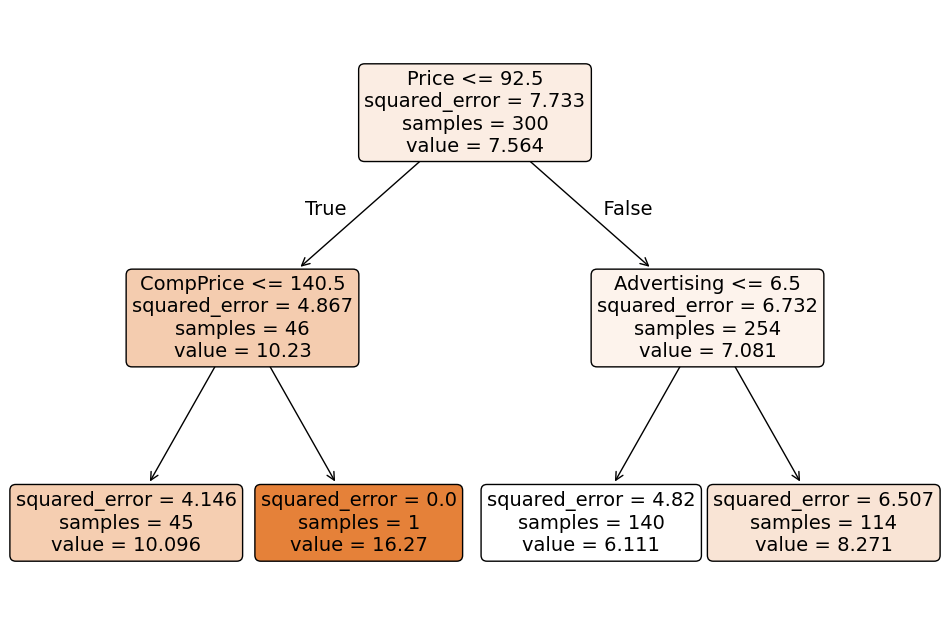

In [ ]:
#B
tree_model = DecisionTreeRegressor(max_depth=2, random_state=2025)
tree_model.fit(X_train, y_train)
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.show()


By looking at the following tree we can interpret the following:

1. Price is the most important variable, and the best cutting or binning point is 92.5. By being the first node this tell us that if we predict all rows with 7.564 the MSE would be 7.733 (The mean of this variable would be the best predictor).

2. The second region would be CompPrice which separates with 46 out of 300 features and the cutting point is defined by 140.5. For this subset if we predict the mean we would get 4.867 MSE.


3. We could keep dividing the regions into smaller ones lowering or bias until we get more terminal nodes like the one in orange which is completely pure, by incrementing the deepth of the tree and aumenting the variance our model will have.





[]

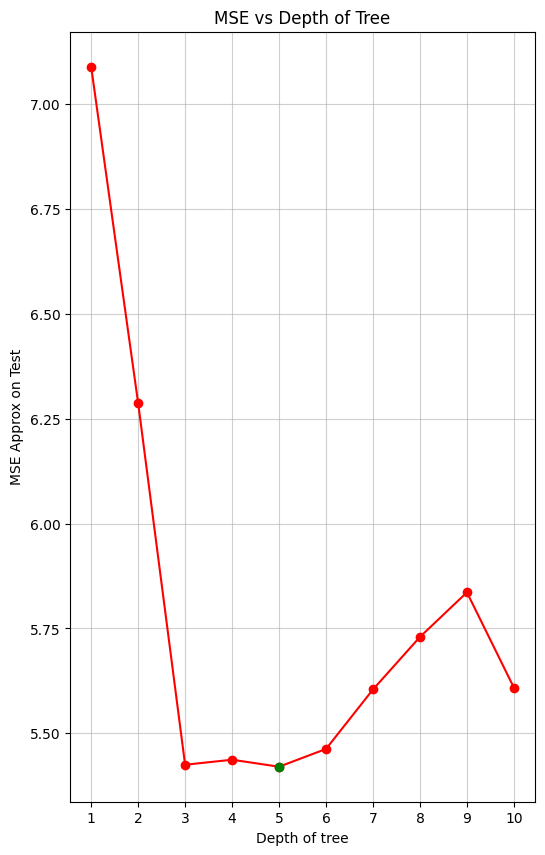

In [ ]:
level_depth_scores_dict = {}
max_depth = 10

for max_d in range(1, max_depth + 1):
    rf = DecisionTreeRegressor(max_depth=max_d, random_state = 2025)
    mse = (-np.mean(cross_val_score(rf, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')))
    level_depth_scores_dict[max_d] = mse
best_depth = min(level_depth_scores_dict, key = level_depth_scores_dict.get)
best = level_depth_scores_dict[best_depth]
plt.figure(figsize = (6,10))

plt.plot(range(1, max_depth + 1), level_depth_scores_dict.values(), marker = 'o', color = 'red')
plt.plot(best_depth,best,marker = 'o', color = 'green')
plt.xlabel('Depth of tree')
plt.xticks(ticks = (range(1, max_depth + 1)))
plt.ylabel('MSE Approx on Test')
plt.title('MSE vs Depth of Tree')
plt.grid(alpha = 0.6)
plt.plot()

In [ ]:
#c
rf = DecisionTreeRegressor(max_depth=5, random_state = 2025)
rf.fit(X_train, y_train)

model_preds = rf.predict(X_test)

mse = mean_squared_error(y_test, model_preds)
print(f'The MSE on test is: {mse:.5f}')

The MSE on test is: 4.72642


The MSE is lower that the predicted with cross validation.

Prunning was good since with a simpler model we got better results as we can see in the plot.

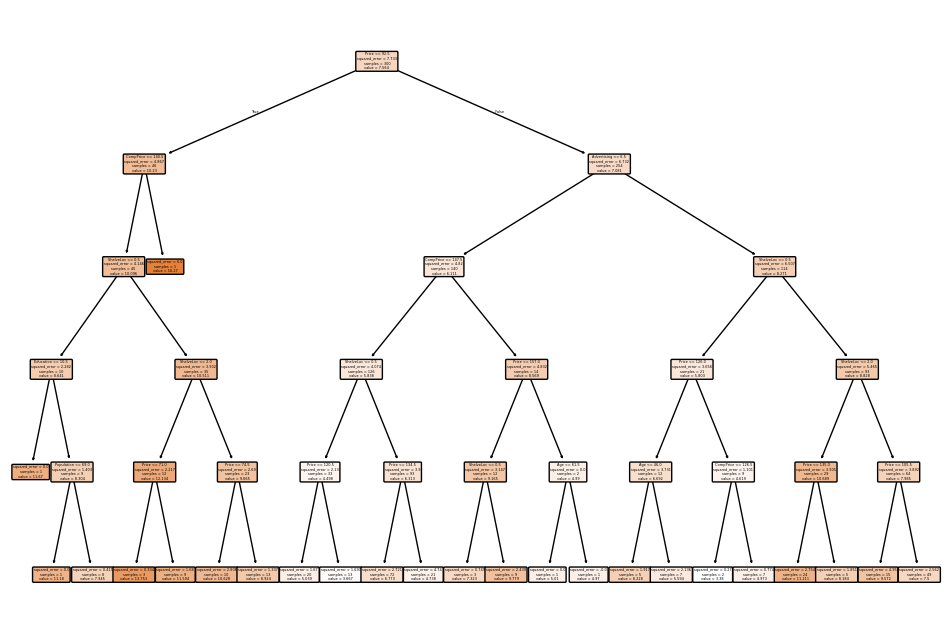

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(rf, feature_names=X.columns, filled=True, rounded=True)
plt.show()

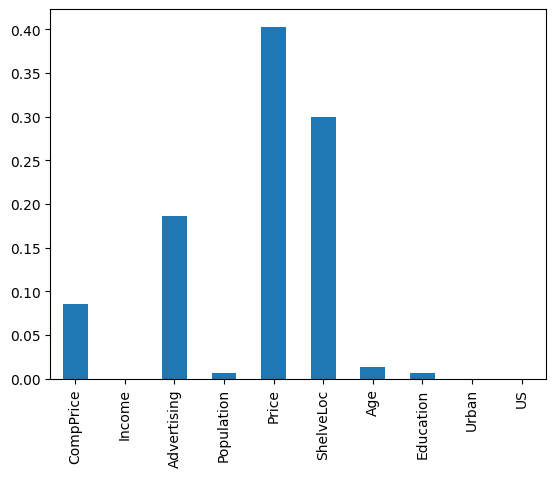

In [ ]:
#what about the importances?
importances = pd.DataFrame(rf.feature_importances_, index = X.columns).plot.bar(legend = False)


In [ ]:
#D
basic_tree = DecisionTreeRegressor(max_depth=10, random_state=2025)
bagging = BaggingRegressor(estimator=basic_tree,
                           n_estimators=500,
                           bootstrap=True,
                           random_state=2025)
bagging.fit(X_train, y_train)
model_preds = bagging.predict(X_test)
mse = mean_squared_error(y_test, model_preds)

print(f'The MSE on the Test set is: {mse:.5f}')


The MSE on the Test set is: 3.31429


<Axes: title={'center': 'Feature Importances Bagging Model'}>

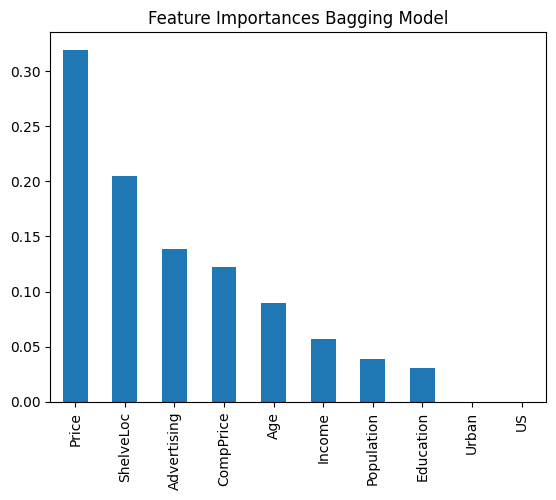

In [ ]:
#No feature_importances_ method on bagging so you need to take the avg of each tree that complements the bagging regressor classifier
importances = np.mean([tree.feature_importances_ for tree in bagging.estimators_], axis=0)
pd.Series(importances, index=X.columns).sort_values(ascending=False).plot.bar(legend=False, title="Feature Importances Bagging Model")

Surprisingly using bagging wont help us lowering our bias in the model. So the best predictor is the Single DecisionTree.

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
model_preds = rf.predict(X_test)
mse = mean_squared_error(y_test, model_preds)
print(f'The MSE on the Test set is: {mse:.5f}')


The MSE on the Test set is: 3.27669


[]

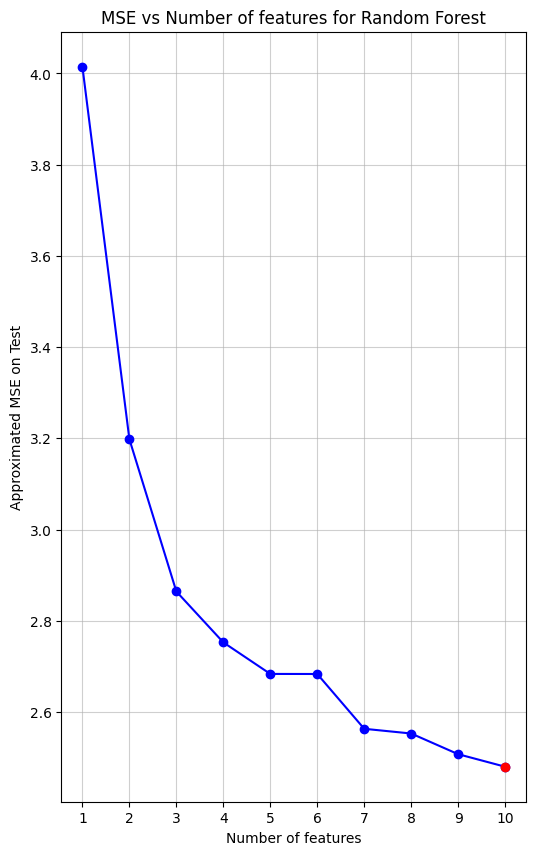

In [ ]:
#E Using OOB approach instead of Cross_val
mse_dict = {}
for n_vars in range(1, X.shape[1] + 1):
    rf = RandomForestRegressor(max_features=n_vars, oob_score = True, random_state = 2025)
    rf.fit(X_train, y_train)
    oob_predictions = rf.oob_prediction_
    mse = mean_squared_error(y_train, oob_predictions)
    mse_dict[n_vars] = mse

best_n_features = min(mse_dict, key = mse_dict.get)
lowest_score = mse_dict[best_n_features]

plt.figure(figsize=(6, 10))
plt.plot(range(1, X.shape[1] + 1), mse_dict.values(), marker = 'o', color = 'blue')
plt.plot(best_n_features, lowest_score, marker = 'o', color = 'red')
plt.xlabel('Number of features')
plt.xticks(ticks = range(1, X.shape[1] + 1))
plt.ylabel('Approximated MSE on Test')
plt.title('MSE vs Number of features for Random Forest')
plt.grid(alpha = 0.6)
plt.plot()

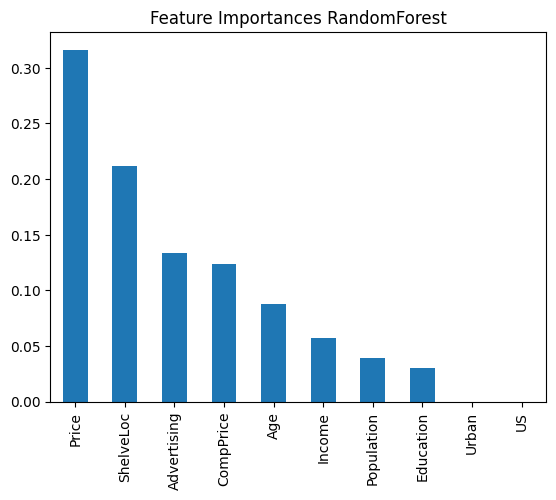

In [ ]:
#Train the model with best results
rf = RandomForestRegressor(max_features=10, random_state= 2025).fit(X_train, y_train)
df_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending = False).plot.bar(legend = False, title = 'Feature Importances RandomForest')

In [ ]:
model_preds = rf.predict(X_test)
mse = mean_squared_error(y_test, model_preds)
print(f'The MSE on test is: {mse:.5f}')

The MSE on test is: 3.25911


We see that by using an uncorrelated approach of bagging (Random Forest) we got a much lower bias on the oob_score but a decent chunk of variance on the real trainning set. RandomForest was more effective than the bagging regressor, adding some prunning might be able to lower the variance of the model & using cross_Validation to choose the number of variables could help to have a more robust scoring system.